## Document Analysis of 20 Histories

#### Project HackMD card
https://hackmd.io/DgWmLHo_SvGBVjUs57O70g?both

In [1]:
from Book2 import Book
import re
import os, time, datetime
import pandas as pd
import altair as alt
import numpy as np

In [2]:
from DocCollect import AddChar2Dict, AddWord2Dict, DictTopN, \
getIndentedDocuments, getQuotedDocuments, getQuotedDocumentsFromCommentaries, \
Histories, HistoryE2C, HistoryC2E, normalizeBookNames, \
RetrieveDocumentsMain, RetrieveDocumentsCommentary, \
scrollNum, sectionType, processScrollSectionDicts, \
consolidateCommentaries, getDocsSummary

In [3]:
HistoryE2C['Sanguozhi'], HistoryC2E['後漢書']

('三國志', 'HouHanShu')

In [4]:
#hist = HistoryC2E['三國志']
#book = Book(hist)

In [5]:
Books = [None] * len(Histories)
for i, hist in enumerate(Histories):
    #if hist != 'Sanguozhi': continue
    Books[i] = Book(hist)
    Books[i].load_htmls(f"./data/medievalHistories/{hist}/")
    Books[i].extract_paths()
    Books[i].metainfo()
    Books[i].strip_all_irrelevant_tags()
    normalizeBookNames(Books[i]) # change 'book title' in flat_meta from Chinese to pinyin 
    consolidateCommentaries(Books[i]) # 
    processScrollSectionDicts(Books[i])
    RetrieveDocumentsMain(Books[i])
    RetrieveDocumentsCommentary(Books[i])
    getDocsSummary(Books[i])
    if i > 4: break


INFO:root:Stop at loading ./data/medievalHistories/Shiji/Shiji_0392.html.
INFO:root:Total length of the data is 392.


Shiji
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
392


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Hanshu/Hanshu_0897.html.
INFO:root:Total length of the data is 897.


Hanshu
list index out of range
897


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Sanguozhi/Sanguozhi_0495.html.
INFO:root:Total length of the data is 495.


Sanguozhi
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
495


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/HouHanShu/HouHanShu_1141.html.
INFO:root:Total length of the data is 1141.


HouHanShu
1141


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Songshu/Songshu_0969.html.
INFO:root:Total length of the data is 969.


Songshu
969


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Nanqishu/Nanqishu_0822.html.
INFO:root:Total length of the data is 822.


Nanqishu
list index out of range
822


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.


In [7]:
Books[2]

       type       variable                 method current_length
0      meta      flat_meta      self.extract_meta            495
1      path          paths     self.extract_paths            495
2  passages  flat_passages  self.extract_passages              0

### Create a unifed pandas dataframe from the docsSummary attribute of each book

In [8]:
# Column names and their data types for pandas dataframe

column_names_text = '''
book fileno scrollno section 
grandCharCnt commentaryCharCnt
iDocsCntM iDocsCharCntM qDocsCntM qDocsCharCntM 
qDocsCntC qDocsCharCntC 
'''
column_names = column_names_text.strip().split()

### Data dictionary (meanings of column names above)
# book              = 'book name', e.g. Sanguozhi
# fileno            = 'file no.' (HTML serial no.)
# scrollno          = 'scroll no.' i.e., 卷
# section           = 'section', e.g., 列傳，本紀
# grandCharCnt      = 'total char count, minus commentaries, bookmark'
# commentaryChatCnt = 'total commentary char count'
# iDocsCntM         = indented docs from Main Text, document count
# iDocsCharCntM     = indented docs from Main Text, total char count
# qDocsCntM         = quoted docs from Main Text, document count
# qDocsCharCntM     = quoted docs from Main Text, total char count
# qDocsCntC         = quoted docs from Commentaries, document count
# qDocsCharCntC     = quoted docs from Commentaries, total char count

data_types_str = '''
str str Int64 str
Int64 Int64 
Int64 Int64 Int64 Int64 
Int64 Int64
'''
data_types = data_types_str.strip().split()

# the following column data types will be imposed on the DataFrame after it is created ('astype')
col_dtype = {c: data_types[i] for i, c in enumerate(column_names)}  # dictionary comprehension
col_dtype

{'book': 'str',
 'fileno': 'str',
 'scrollno': 'Int64',
 'section': 'str',
 'grandCharCnt': 'Int64',
 'commentaryCharCnt': 'Int64',
 'iDocsCntM': 'Int64',
 'iDocsCharCntM': 'Int64',
 'qDocsCntM': 'Int64',
 'qDocsCharCntM': 'Int64',
 'qDocsCntC': 'Int64',
 'qDocsCharCntC': 'Int64'}

In [9]:
All_Summary = []
for book in Books:
    if book is None: continue
    All_Summary.extend(book.docsSummary)
df = pd.DataFrame(data=All_Summary, columns=column_names)
df = df.astype(col_dtype)

## Now add two columns: 'total docs count' and 'total docs char count'
df['docsCntTotal']     = df['iDocsCntM'] + df['qDocsCntM'] + df['qDocsCntC']
df['docsCharCntTotal'] = df['iDocsCharCntM'] + df['qDocsCharCntM'] + df['qDocsCharCntC']

df.head(5)

,book,fileno,scrollno,section,grandCharCnt,commentaryCharCnt,iDocsCntM,iDocsCharCntM,qDocsCntM,qDocsCharCntM,qDocsCntC,qDocsCharCntC,docsCntTotal,docsCharCntTotal
0,Shiji,0000,1,本紀,390,0,0,0,0,0,0,0,0,0
1,Shiji,0001,1,本紀,612,6014,0,0,0,0,1,156,1,156
2,Shiji,0002,1,本紀,142,610,0,0,0,0,0,0,0,0
3,Shiji,0003,1,本紀,260,852,0,0,0,0,0,0,0,0
4,Shiji,0004,1,本紀,1371,9014,0,0,0,0,2,550,2,550


In [11]:
df.shape

(4716, 14)

In [33]:
len(Books[5].flat_bodies)

822

#### Possible values of 'section' column
 '世家',  '傳:', '列傳', '史記正義', '吳書', '志', '書', '本紀',
 '紀:', '蜀書', '表', '魏書', '點校後記'

In [10]:
## Compare the following two histories
Songshu   =  df[ (df.book=='Songshu') & (df.section.isin(['列傳', '本紀'])) ]
Sanguozhi =  df[ (df.book=='Sanguozhi') ]

In [11]:
Songshu['iDocsCntM'].groupby(Songshu.scrollno).sum()
Songshu['iDocsCharCntM'].groupby(Songshu.scrollno).sum()


scrollno
1      1231
2      6974
3       401
4       379
5         0
       ... 
96        0
97     4729
98      428
99     1078
100    1157
Name: iDocsCharCntM, Length: 70, dtype: Int64

In [68]:
Songshu   =  df[ (df.book=='Songshu') & (df.section.isin(['列傳'])) ]
Songshu.head(5)

,book,fileno,scrollno,section,grandCharCnt,commentaryCharCnt,iDocsCntM,iDocsCharCntM,qDocsCntM,qDocsCharCntM,qDocsCntC,qDocsCharCntC,docsCntTotal,docsCharCntTotal
3502,Songshu,0577,41,列傳,2179,0,0,0,0,0,0,0,0,0
3503,Songshu,0578,41,列傳,398,0,0,0,0,0,0,0,0,0
3504,Songshu,0579,41,列傳,521,0,0,0,0,0,0,0,0,0
3505,Songshu,0580,41,列傳,204,0,0,0,0,0,0,0,0,0
3506,Songshu,0581,41,列傳,194,0,0,0,0,0,0,0,0,0


### Plot total no. of characters in documents by scroll no. for a given book

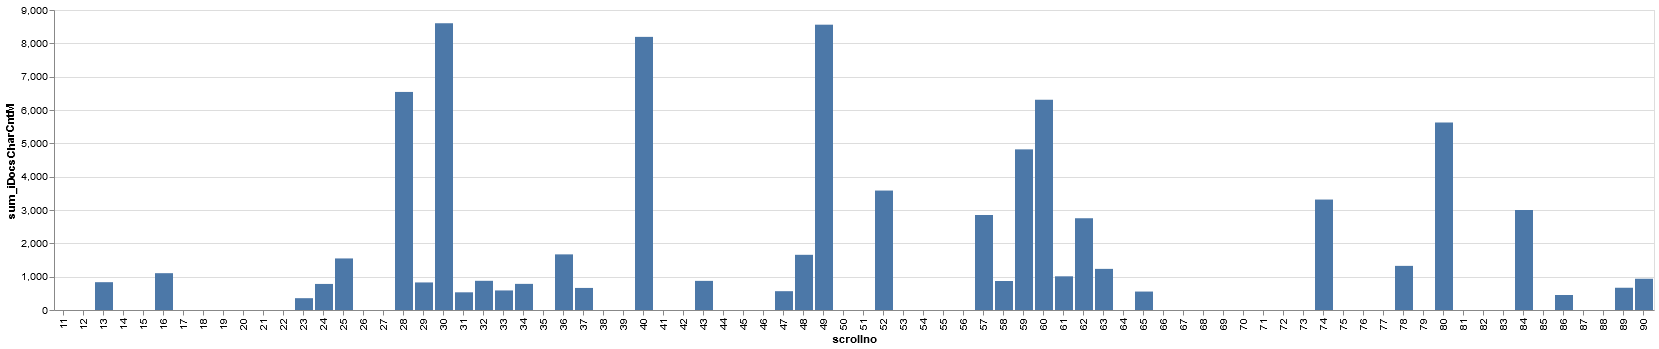

In [69]:
book   = 'HouHanShu'
dfBook =  df[ (df.book==book) & (df.section.isin(['列傳'])) ]
dfPlot = pd.DataFrame({
    'scrollno': dfBook['scrollno'].to_numpy(),
    'iDocsCharCntM': dfBook['iDocsCharCntM'].to_numpy()
})

alt.Chart(dfPlot).mark_bar().encode(
    y='sum_iDocsCharCntM:Q',
    x='scrollno:O'
).transform_aggregate(
    sum_iDocsCharCntM='sum(iDocsCharCntM)',
    groupby=["scrollno"]
)

In [12]:
Histories[:5]

['Shiji', 'Hanshu', 'Sanguozhi', 'HouHanShu', 'Songshu']

### ‘dfBooks' below contains the portions of the histories that we're studying (列傳, except 三國志)

In [47]:
# Concatenating history using pandas.concat() function
dfBooks = df[ (df.book==Histories[0]) & (df.section.isin(['列傳'])) ]  # initialize first book
for hist in Histories[1:]:
    if hist is None: continue
    #print(hist)
    if hist == 'Sanguozhi': # we want everything
        newdf = df[ df.book==hist ]  
    else:
        newdf = df[ (df.book==hist) & (df.section.isin(['列傳'])) ]
    dfBooks = pd.concat([dfBooks, newdf])
        

### Plot total no. of characters in documents by book (Method 1 -- preferred)

In [48]:
xx = dfBooks['iDocsCharCntM'].groupby(dfBooks['book']).sum()

In [64]:
xx = dfBooks.groupby('book')['iDocsCharCntM', 'iDocsCntM'].sum()
xx

,iDocsCharCntM,iDocsCntM
book,,
Hanshu,115276,110
HouHanShu,84869,93
Nanqishu,31032,38
Sanguozhi,28462,25
Shiji,50926,37
Songshu,111375,114


In [69]:
dfPlot = pd.DataFrame({
    'book': xx.index.to_numpy(),
    'iDocsCharCntM': xx['iDocsCharCntM'].to_numpy()
})

chartCharCount = alt.Chart(dfPlot).mark_bar().encode(
    x='sum_iDocsCharCntM:Q',
    y=alt.Y('book:O', sort=Histories[:12])
).transform_aggregate(
    sum_iDocsCharCntM='sum(iDocsCharCntM)',
    groupby=["book"]
)

In [70]:
dfPlot = pd.DataFrame({
    'book': xx.index.to_numpy(),
    'iDocsCntM': xx['iDocsCntM'].to_numpy()
})

chartDocCount = alt.Chart(dfPlot).mark_bar().encode(
    x='sum_iDocsCntM:Q',
    y=alt.Y('book:O', sort=Histories[:12])
).transform_aggregate(
    sum_iDocsCntM='sum(iDocsCntM)',
    groupby=["book"]
)

### total character counts and total document counts side by side

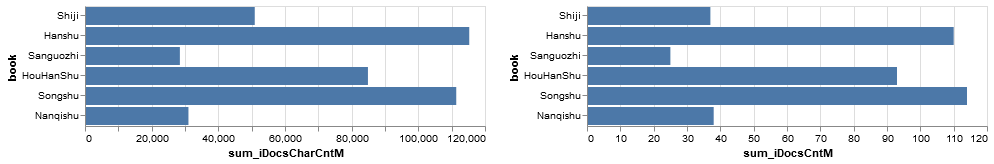

In [71]:
chartCharCount | chartDocCount

### Plot total no. of characters in documents by book (Method 2)

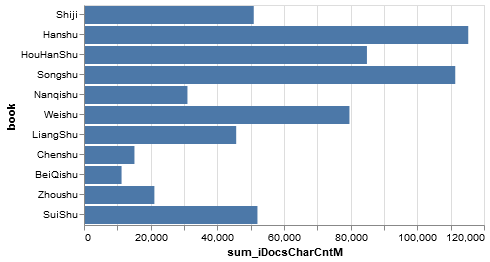

In [74]:
dfBook =  df[ (df.book.isin(Histories[:12])) & (df.section.isin(['列傳'])) ]
dfPlot = pd.DataFrame({
    'book': dfBook['book'].to_numpy(),
    'iDocsCharCntM': dfBook['iDocsCharCntM'].to_numpy()
})

alt.Chart(dfPlot).mark_bar().encode(
    x='sum_iDocsCharCntM:Q',
    y=alt.Y('book:O', sort=Histories[:12])
).transform_aggregate(
    sum_iDocsCharCntM='sum(iDocsCharCntM)',
    groupby=["book"]
)

In [ ]:
Books[0].commentaries[:10]

### Build some vocabularies (NOT UPDATED YET)

In [28]:
# use these 'sentence-terminating' punctuation marks to break 
# paragraphs into sentences
regex_punc = re.compile(r"[　。？！]")   

### Commentaries - Regular Text

#### Need to first remove quoted documents

In [53]:
import zhon

In [54]:
zhon?

Type:        module
String form: <module 'zhon' from 'c:\\python\\lib\\site-packages\\zhon\\__init__.py'>
File:        c:\python\lib\site-packages\zhon\__init__.py
Docstring:   Provides constants used in Chinese text processing.


In [55]:
# Use the same regex to identify "quoted documents" as
# re.split() regex to 'separate out' regular text 
regex_quoted = re.compile(r"(?<=「)[^「]{250,}?(?=」)") 

In [58]:
book = Books[0]
Vocab_Commentaries_RegularText = {}
D = Vocab_Commentaries_RegularText
for (idx, commentary) in book.commentaries:
    pieces = regex_quoted.split(commentary)   # <== crucial
    for p in pieces:
        AddWord2Dict(p, D)

DictTopN(D, 20)

[('索隱', 6166),
 ('正義', 5098),
 ('地志', 982),
 ('漢書', 942),
 ('鄭玄', 645),
 ('韋昭', 629),
 ('以為', 491),
 ('地理', 472),
 ('故城', 416),
 ('左傳', 383),
 ('音義', 355),
 ('應劭', 328),
 ('春秋', 312),
 ('西南', 279),
 ('諸侯', 277),
 ('大夫', 271),
 ('天子', 269),
 ('賈逵', 261),
 ('西北', 260),
 ('郭璞', 254)]

In [31]:
Vocab_Commentaries_Docs = {}
D = Vocab_Commentaries_Docs
for (idx, commentaries) in qDocsCommentary.items():
    for c in commentaries:
        AddWord2Dict(c, D)

DictTopN(D, 20)

[('天下', 100),
 ('將軍', 67),
 ('陛下', 67),
 ('不可', 66),
 ('以為', 64),
 ('是以', 57),
 ('所以', 49),
 ('不得', 42),
 ('不能', 39),
 ('足下', 35),
 ('天命', 32),
 ('可以', 30),
 ('足以', 29),
 ('受命', 27),
 ('皇帝', 26),
 ('然後', 24),
 ('春秋', 24),
 ('天子', 23),
 ('君子', 23),
 ('先帝', 22)]

In [32]:
AllDf.head(30)

,Index,iDocCount,iDocCharCount,qDocCount,qDocCharCount,qDocCountCommentary,qDocCharCountCommentary
0,0,1,1475,0,0,5,2937
1,66,1,1387,0,0,0,0
2,91,1,696,1,402,1,296
3,116,3,3231,0,0,1,280
4,135,4,4939,0,0,4,2819
5,192,2,2207,4,1472,0,0
6,199,1,1374,0,0,0,0
7,205,1,826,1,425,1,895
8,276,1,750,1,349,4,1868
9,277,1,1006,0,0,0,0


{'section',
 '世家',
 '傳:',
 '列傳',
 '史記正義',
 '吳書',
 '志',
 '書',
 '本紀',
 '紀:',
 '蜀書',
 '表',
 '魏書',
 '點校後記'}